<a href="https://colab.research.google.com/github/Alanoudhud/DataMining-Project/blob/main/phase3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import tree

In [ ]:
df = pd.read_csv('lung_cancer_preprocessed.csv')
X = df.drop(['lung_cancer'], axis=1)  # الميزات
y = df['lung_cancer']
print(df.head())

   patient_id  age  gender  pack_years  radon_exposure  asbestos_exposure  \
0      100000    2       1    0.660248               2                  0   
1      100001    0       0    0.127785               2                  0   
2      100002    2       0    0.004055               1                  1   
3      100003    2       0    0.440640               0                  0   
4      100004    0       0    0.444313               1                  1   

   secondhand_smoke_exposure  copd_diagnosis  alcohol_consumption  \
0                          0               1                    1   
1                          1               1                    1   
2                          1               1                    0   
3                          1               0                    1   
4                          0               1                    0   

   family_history lung_cancer  
0               0          No  
1               1         Yes  
2               0         

In [ ]:
# التحضير للميزات (حذف عمود patient_id لأنه معرف)
X = df.drop(['lung_cancer', 'patient_id'], axis=1)  # حذف عمود patient_id و lung_cancer (الهدف)
y = df['lung_cancer']  # الهدف

In [ ]:
# تقسيم البيانات إلى 70% تدريب و 30% اختبار
X_train_70, X_test_30, y_train_70, y_test_30 = train_test_split(X, y, test_size=0.3, random_state=42)

# تقسيم البيانات إلى 80% تدريب و 20% اختبار
X_train_80, X_test_20, y_train_80, y_test_20 = train_test_split(X, y, test_size=0.2, random_state=42)

# تقسيم البيانات إلى 90% تدريب و 10% اختبار
X_train_90, X_test_10, y_train_90, y_test_10 = train_test_split(X, y, test_size=0.1, random_state=42)

In [ ]:
# معايير Gini
clf_gini_70 = DecisionTreeClassifier(criterion='gini', random_state=42)
clf_gini_70.fit(X_train_70, y_train_70)

clf_gini_80 = DecisionTreeClassifier(criterion='gini', random_state=42)
clf_gini_80.fit(X_train_80, y_train_80)

clf_gini_90 = DecisionTreeClassifier(criterion='gini', random_state=42)
clf_gini_90.fit(X_train_90, y_train_90)

DecisionTreeClassifier(random_state=42)

In [ ]:
# تنبؤات مع نموذج Gini
y_pred_70_gini = clf_gini_70.predict(X_test_30)
y_pred_80_gini = clf_gini_80.predict(X_test_20)
y_pred_90_gini = clf_gini_90.predict(X_test_10)

In [ ]:
# معايير Entropy
clf_entropy_70 = DecisionTreeClassifier(criterion='entropy', random_state=42)
clf_entropy_70.fit(X_train_70, y_train_70)

clf_entropy_80 = DecisionTreeClassifier(criterion='entropy', random_state=42)
clf_entropy_80.fit(X_train_80, y_train_80)

clf_entropy_90 = DecisionTreeClassifier(criterion='entropy', random_state=42)
clf_entropy_90.fit(X_train_90, y_train_90)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [ ]:
# تنبؤات مع نموذج Gini
y_pred_70_gini = clf_gini_70.predict(X_test_30)
y_pred_80_gini = clf_gini_80.predict(X_test_20)
y_pred_90_gini = clf_gini_90.predict(X_test_10)

In [ ]:
# حساب دقة نموذج Gini
accuracy_70_gini = accuracy_score(y_test_30, y_pred_70_gini)
accuracy_80_gini = accuracy_score(y_test_20, y_pred_80_gini)
accuracy_90_gini = accuracy_score(y_test_10, y_pred_90_gini)

In [ ]:
# مصفوفة الالتباس لمعيار Gini
cm_70_gini = confusion_matrix(y_test_30, y_pred_70_gini)
cm_80_gini = confusion_matrix(y_test_20, y_pred_80_gini)
cm_90_gini = confusion_matrix(y_test_10, y_pred_90_gini)

In [ ]:
# إنشاء كائن لشجرة القرار مع معيار Gini
clf_gini_70 = DecisionTreeClassifier(criterion='gini', random_state=42)
clf_gini_80 = DecisionTreeClassifier(criterion='gini', random_state=42)
clf_gini_90 = DecisionTreeClassifier(criterion='gini', random_state=42)

# إنشاء كائن لشجرة القرار مع معيار Entropy
clf_entropy_70 = DecisionTreeClassifier(criterion='entropy', random_state=42)
clf_entropy_80 = DecisionTreeClassifier(criterion='entropy', random_state=42)
clf_entropy_90 = DecisionTreeClassifier(criterion='entropy', random_state=42)

# تدريب نموذج شجرة القرار مع معيار Gini
clf_gini_70.fit(X_train_70, y_train_70)
clf_gini_80.fit(X_train_80, y_train_80)
clf_gini_90.fit(X_train_90, y_train_90)

# تدريب نموذج شجرة القرار مع معيار Entropy
clf_entropy_70.fit(X_train_70, y_train_70)
clf_entropy_80.fit(X_train_80, y_train_80)
clf_entropy_90.fit(X_train_90, y_train_90)



# التنبؤ باستخدام معيار Gini
y_pred_70_gini = clf_gini_70.predict(X_test_30)
y_pred_80_gini = clf_gini_80.predict(X_test_20)
y_pred_90_gini = clf_gini_90.predict(X_test_10)

# التنبؤ باستخدام معيار Entropy
y_pred_70_entropy = clf_entropy_70.predict(X_test_30)
y_pred_80_entropy = clf_entropy_80.predict(X_test_20)
y_pred_90_entropy = clf_entropy_90.predict(X_test_10)

In [ ]:

# حساب دقة النموذج باستخدام معيار Gini
accuracy_70_gini = accuracy_score(y_test_30, y_pred_70_gini)
accuracy_80_gini = accuracy_score(y_test_20, y_pred_80_gini)
accuracy_90_gini = accuracy_score(y_test_10, y_pred_90_gini)

# حساب دقة النموذج باستخدام معيار Entropy
accuracy_70_entropy = accuracy_score(y_test_30, y_pred_70_entropy)
accuracy_80_entropy = accuracy_score(y_test_20, y_pred_80_entropy)
accuracy_90_entropy = accuracy_score(y_test_10, y_pred_90_entropy)

# طباعة الدقة لكل تقسيم
print("*Accuracy for Gini*")
print(f"70/30 Split: {accuracy_70_gini}")
print(f"80/20 Split: {accuracy_80_gini}")
print(f"90/10 Split: {accuracy_90_gini}")

print("\n*Accuracy for Entropy*")
print(f"70/30 Split: {accuracy_70_entropy}")
print(f"80/20 Split: {accuracy_80_entropy}")
print(f"90/10 Split: {accuracy_90_entropy}")

*Accuracy for Gini*
70/30 Split: 0.6512
80/20 Split: 0.6562
90/10 Split: 0.6482

*Accuracy for Entropy*
70/30 Split: 0.6488666666666667
80/20 Split: 0.6512
90/10 Split: 0.6504


*Confusion Matrix for Gini*
70/30 Split:
[[2068 2594]
 [2638 7700]]
80/20 Split:
[[1413 1705]
 [1733 5149]]
90/10 Split:
[[ 692  876]
 [ 883 2549]]

*Confusion Matrix for Entropy*
70/30 Split:
[[2049 2613]
 [2654 7684]]
80/20 Split:
[[1407 1711]
 [1777 5105]]
90/10 Split:
[[ 679  889]
 [ 859 2573]]


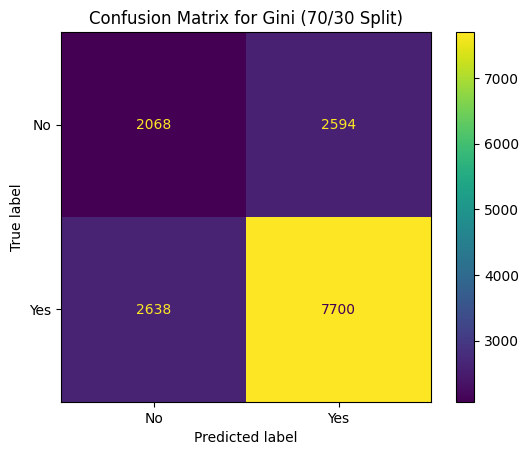

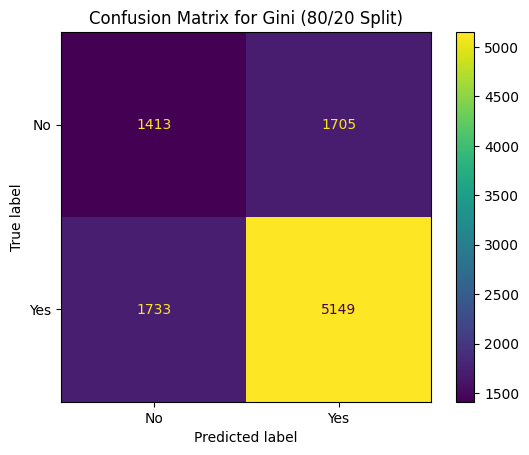

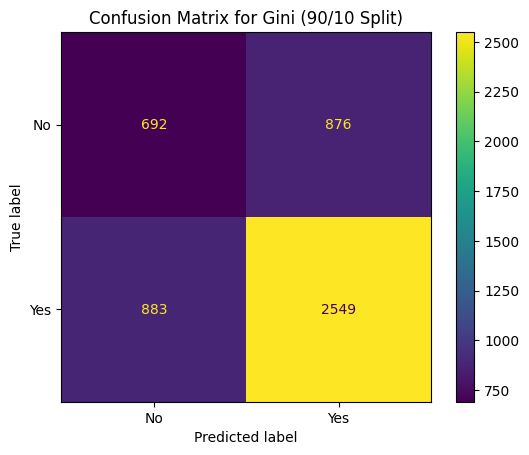

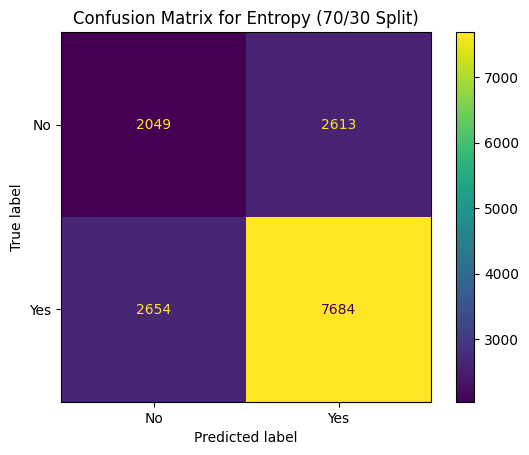

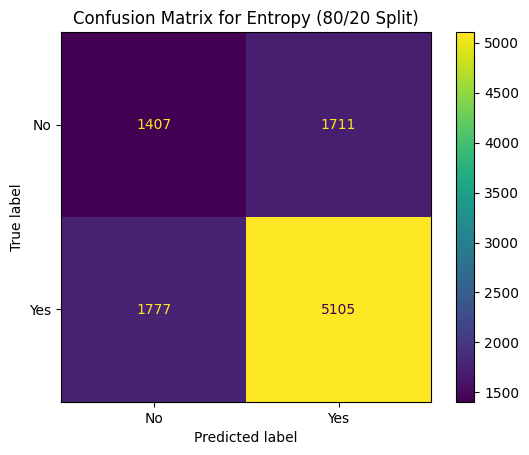

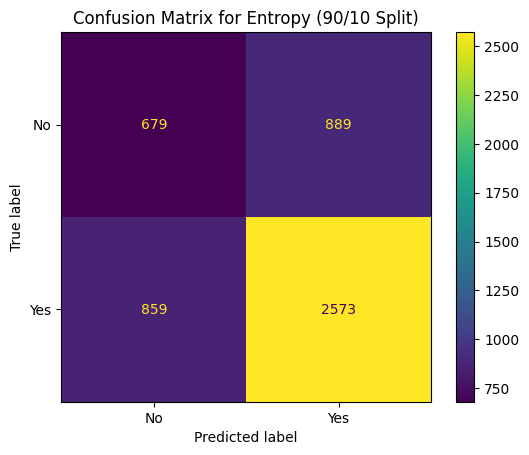

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# حساب مصفوفة الالتباس باستخدام Gini
cm_70_gini = confusion_matrix(y_test_30, y_pred_70_gini)
cm_80_gini = confusion_matrix(y_test_20, y_pred_80_gini)
cm_90_gini = confusion_matrix(y_test_10, y_pred_90_gini)

# حساب مصفوفة الالتباس باستخدام Entropy
cm_70_entropy = confusion_matrix(y_test_30, y_pred_70_entropy)
cm_80_entropy = confusion_matrix(y_test_20, y_pred_80_entropy)
cm_90_entropy = confusion_matrix(y_test_10, y_pred_90_entropy)

# طباعة مصفوفة الالتباس لكل تقسيم
print("*Confusion Matrix for Gini*")
print(f"70/30 Split:\n{cm_70_gini}")
print(f"80/20 Split:\n{cm_80_gini}")
print(f"90/10 Split:\n{cm_90_gini}")

print("\n*Confusion Matrix for Entropy*")
print(f"70/30 Split:\n{cm_70_entropy}")
print(f"80/20 Split:\n{cm_80_entropy}")
print(f"90/10 Split:\n{cm_90_entropy}")

# الحصول على أسماء التصنيفات من البيانات
cn = df['lung_cancer'].unique()

# عرض مصفوفة الالتباس لكل تقسيم باستخدام Gini
disp_70_gini = ConfusionMatrixDisplay(confusion_matrix=cm_70_gini, display_labels=cn)
disp_70_gini.plot(cmap='viridis')  # تم تغيير اللون إلى viridis
plt.title("Confusion Matrix for Gini (70/30 Split)")
plt.show()

disp_80_gini = ConfusionMatrixDisplay(confusion_matrix=cm_80_gini, display_labels=cn)
disp_80_gini.plot(cmap='viridis')  # تم تغيير اللون إلى viridis
plt.title("Confusion Matrix for Gini (80/20 Split)")
plt.show()

disp_90_gini = ConfusionMatrixDisplay(confusion_matrix=cm_90_gini, display_labels=cn)
disp_90_gini.plot(cmap='viridis')  # تم تغيير اللون إلى viridis
plt.title("Confusion Matrix for Gini (90/10 Split)")
plt.show()

# عرض مصفوفة الالتباس لكل تقسيم باستخدام Entropy
disp_70_entropy = ConfusionMatrixDisplay(confusion_matrix=cm_70_entropy, display_labels=cn)
disp_70_entropy.plot(cmap='viridis')  # تم تغيير اللون إلى viridis
plt.title("Confusion Matrix for Entropy (70/30 Split)")
plt.show()

disp_80_entropy = ConfusionMatrixDisplay(confusion_matrix=cm_80_entropy, display_labels=cn)
disp_80_entropy.plot(cmap='viridis')  # تم تغيير اللون إلى viridis
plt.title("Confusion Matrix for Entropy (80/20 Split)")
plt.show()

disp_90_entropy = ConfusionMatrixDisplay(confusion_matrix=cm_90_entropy, display_labels=cn)
disp_90_entropy.plot(cmap='viridis')  # تم تغيير اللون إلى viridis
plt.title("Confusion Matrix for Entropy (90/10 Split)")
plt.show()

Index(['patient_id', 'age', 'gender', 'pack_years', 'radon_exposure',
       'asbestos_exposure', 'secondhand_smoke_exposure', 'copd_diagnosis',
       'alcohol_consumption', 'family_history'],
      dtype='object')
['No' 'Yes']


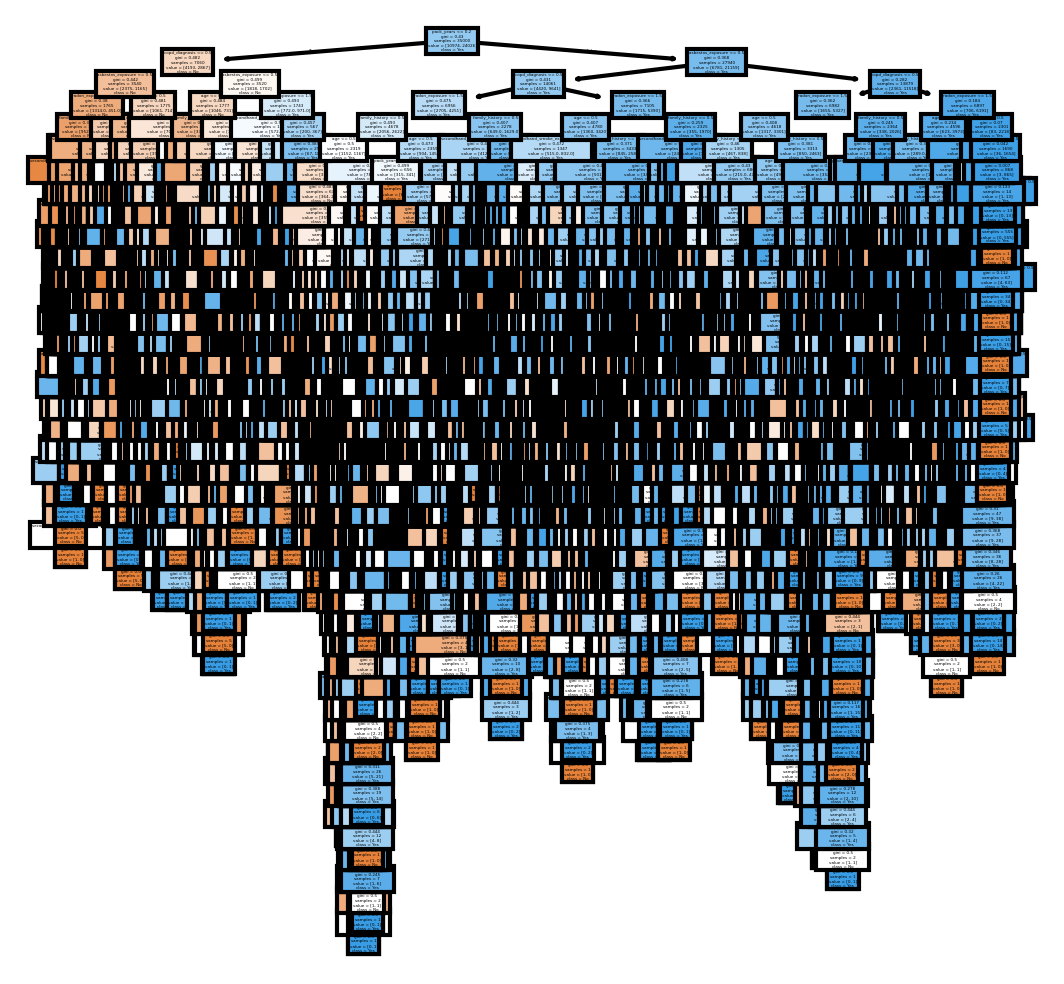

In [10]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt
import pandas as pd # Import pandas

# تحديد الأعمدة (الخصائص) والهدف بناءً على بياناتك
df = pd.read_csv('lung_cancer_preprocessed.csv') # Load the dataframe
X = df.drop('lung_cancer', axis=1)  # استبدال 'lung cancer' باسم العمود الهدف
y = df['lung_cancer']  # العمود الذي يحتوي على الفئات المستهدفة

# تحقق من أن الأعمدة والفئات تم تحديدها بشكل صحيح
print(X.columns)  # الأعمدة
print(y.unique())  # الفئات المستهدفة (إذا كان اسم العمود هو الفئات)

# تقسيم البيانات إلى مجموعات تدريب واختبار (استناداً إلى بياناتك)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# إنشاء نموذج شجرة القرار مع معيار Gini
clf_gini_70 = DecisionTreeClassifier(criterion='gini', random_state=42)
clf_gini_70.fit(X_train, y_train)

# التنبؤ باستخدام الموديل
y_pred_70_gini = clf_gini_70.predict(X_test)

# تحديد أسماء الأعمدة والفئات بشكل دقيق
fn = X.columns  # الأعمدة المأخوذة من X
cn = y.unique()  # الفئات المستهدفة من y

# إعداد الرسم
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(4, 4), dpi=300)
tree.plot_tree(clf_gini_70, feature_names=fn, class_names=cn, filled=True)

# حفظ الصورة
fig.savefig('lung_cancer_decision_tree_gini_70_30.png')

# عرض الشجرة
plt.show()